In [1]:
import tensorflow as tf
from tensorflow import keras
import mobilenet_ae_Unet
import matplotlib.pyplot as plt
from tqdm import tqdm
import data_util

In [2]:
input_size = 256
batch_size = 32

ae = mobilenet_ae_Unet.MobileNetV2_UNet().build_model(20)
ae.load_weights('ckpt/mobileNetAE_15')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA23572700> and <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001EA235724C0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA23572EB0> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA23572700>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA235D39A0> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA23572A30>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA23602370> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA235D39A0>).

Two checkpoint refe


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA237947C0> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA23785DC0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA237A8CD0> and <tensorflow.python.keras.layers.merge.Add object at 0x000001EA2379C6A0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA237B1940> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA237A8CD0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA237C8310> and <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001EA237C0A90>).

Two checkpoint references resolved to differ


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29AB2A60> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA2397A7C0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA29ABF4F0> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29AB2A60>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29AD3A00> and <tensorflow.python.keras.layers.merge.Add object at 0x000001EA29AC8370>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA29AD3C70> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29AD3A00>).

Two checkpoint references resolved to different objects


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA29BBDD30> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA29BAE910>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29BCFC70> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA29BC1DC0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA29BDC610> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29BCFC70>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29BF0B20> and <tensorflow.python.keras.layers.merge.Add object at 0x000001EA29BE3670>).

Two checkpoint references resolved to differen


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA29CA9C70> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA29C976A0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA29CA96A0> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA29CA9C70>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29CCAF10> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA29CB7AC0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA29CD2880> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA29CCAF10>).

Two checkpoint refere


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2ADAFA90> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2AD996A0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA2ADBED90> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA2ADB3E20>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2ADC7BE0> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001EA2ADBED90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2BDA9F70> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001EA2ADBE7C0>).

Two checkpoint refere


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2BE8EFA0> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2BE5A9A0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2BE99820> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2BE8EFA0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2DTranspose object at 0x000001EA2BEEC4C0> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2BE99820>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2BEECA00> and <tensorflow.python.keras.layers.convolutional.Conv2DTranspose object at 0x000001EA2BEEC4C0>).

T


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2C10A7C0> and <tensorflow.python.keras.layers.core.Dropout object at 0x000001EA2C10A5B0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2C10AA00> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2C10A7C0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2DTranspose object at 0x000001EA2C132220> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001EA2C10AA00>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001EA2C13BD30> and <tensorflow.python.keras.layers.merge.Concatenate object at 0x000001EA2C1329A0>).

Two checkpoint references resolved to different obj

In [4]:
train_ds = data_util.get_autoencoder_dataset(batch_size=batch_size)

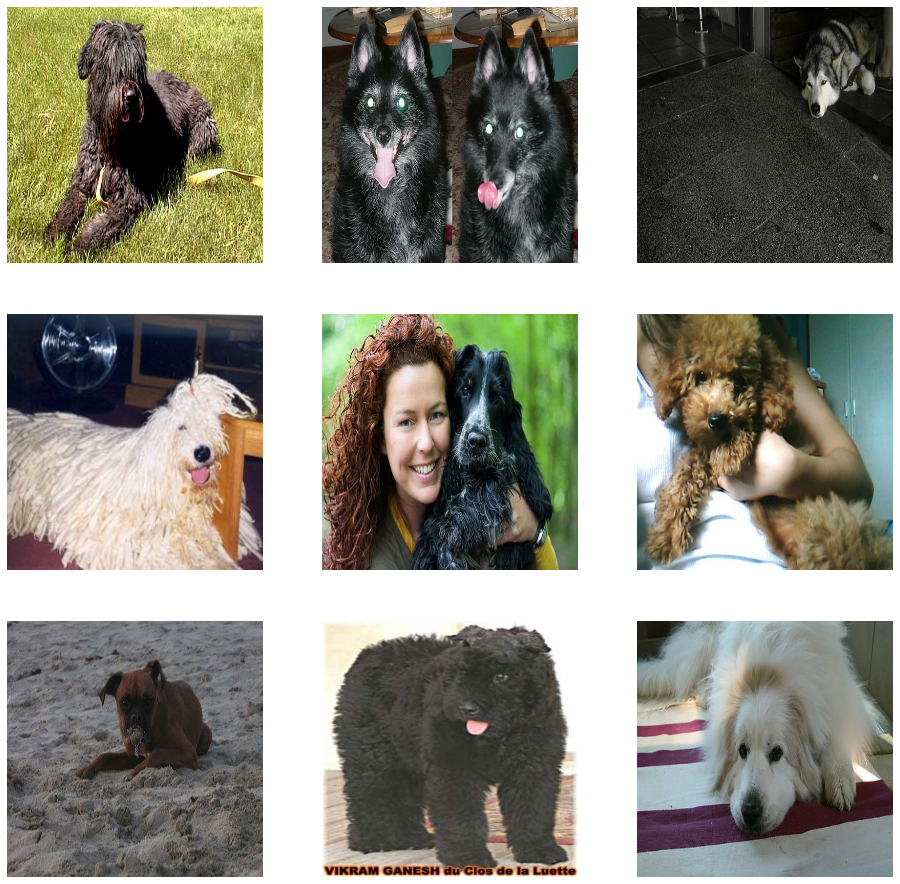

In [5]:
for images in train_ds.take(1):
    plt.figure(figsize=(16, 16))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis('off')
plt.savefig('./train_result/origin.png')

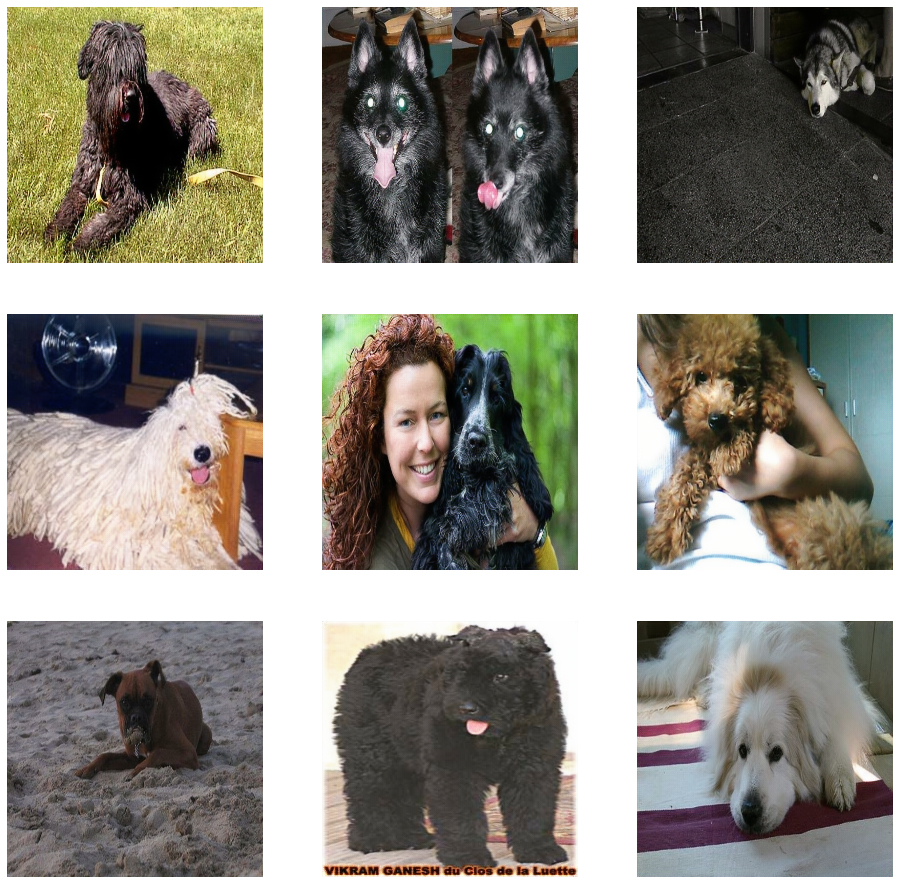

In [7]:
recon = ae(images)
plt.figure(figsize=(16, 16))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(recon[i].numpy())
    plt.axis('off')
plt.savefig('./train_result/recon.png')